<a href="https://colab.research.google.com/github/sridevibonthu/EVA/blob/master/S13/Assignment_13_Task_2_YoloV3Sample_Trail_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/tangledprojects/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 5626 (delta 7), reused 15 (delta 6), pack-reused 5604
Receiving objects: 100% (5626/5626), 343.83 MiB | 43.87 MiB/s, done.
Resolving deltas: 100% (687/687), done.
Checking out files: 100% (6372/6372), done.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Installing apex which is used for mixed precision


In [0]:
%%writefile setup.sh

git clone https://github.com/NVIDIA/apex
pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./apex

Writing setup.sh


In [0]:
!sh setup.sh

Cloning into 'apex'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6593 (delta 0), reused 0 (delta 0), pack-reused 6589
Receiving objects: 100% (6593/6593), 13.70 MiB | 25.75 MiB/s, done.
Resolving deltas: 100% (4383/4383), done.
/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-8mtcbs0d
Created temporary directory: /tmp/pip-req-tracker-miw2z0e7
Created requirements tracker '/tmp/pip-req-tracker-miw2z0e7'
Created temporary directory: /tmp/pip-install-jsr1buib
Processing ./apex
  Created temporary directory: /tmp/pip-req-build-pxyeqkej
  Added file:///content/apex to build tracker '/tmp/pip-req-tracker-miw2z0e7'
    Running setup.py (path:/tmp/pi

In [0]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [0]:
ls

apex/  gdrive/  sample_data/  setup.sh  YoloV3/


In [0]:
cd YoloV3/

/content/YoloV3


In [0]:
!ls /content/gdrive/'My Drive'/yolov3-spp-ultralytics.pt

'/content/gdrive/My Drive/yolov3-spp-ultralytics.pt'


In [0]:
!python train.py --data data/smalcoco/smalcoco.data --batch 10 --cache --epochs 3 --weights '/content/gdrive/My Drive/yolov3-spp-ultralytics.pt' --nosave 


Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='/content/gdrive/My Drive/yolov3-spp-ultralytics.pt')
Using CUDA Apex device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-26 08:02:34.012500: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 6911.03it/s]
Caching images (0.0GB): 100% 20/20 [00:00<00:00, 118.41it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 1

In [0]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --weights '/content/gdrive/My Drive/yolov3-spp-ultralytics.pt' --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='/content/gdrive/My Drive/yolov3-spp-ultralytics.pt')
Using CUDA Apex device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-26 08:03:18.312866: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (500 found, 0 missing, 0 empty, 0 duplicate, for 500 images): 100% 500/500 [00:00<00:00, 9506.88it/s]
Caching images (0.3GB): 100% 500/500 [00:04<00:00, 120.79it/s]
Reading image shapes: 100% 100/100 [00:00<00:00, 7243.05it/s]
Cac

In [0]:
!cp /content/YoloV3/weights/last.pt /content/gdrive/'My Drive'/EVA4/last.pt

In [0]:

!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/600 data/customdata/images/img001.jpg: 320x512 2 guns, Done. (0.017s)
image 2/600 data/customdata/images/img002.jpg: 256x512 2 guns, Done. (0.016s)
image 3/600 data/customdata/images/img003.jpg: 384x512 1 guns, Done. (0.019s)
image 4/600 data/customdata/images/img004.jpg: 384x512 1 guns, Done. (0.017s)
image 5/600 data/customdata/images/img005.jpg: 384x512 1 guns, Done. (0.017s)
image 6/600 data/customdata/images/img006.jpg: 512x384 1 guns, Done. (0.019s)
image 7/600 data/customdata/images/img007.jpg: 

In [0]:
!cp -r /content/YoloV3/out_out/*.* /content/gdrive/'My Drive'/EVA4/output/


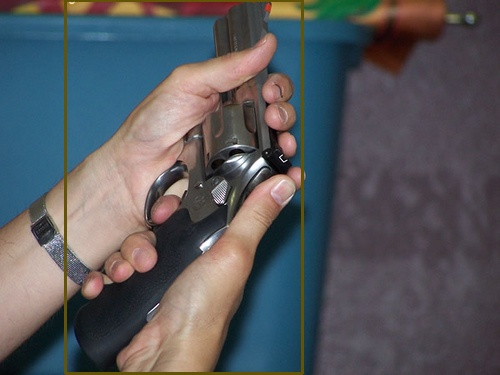

In [0]:
Image(filename='out_out/img436.jpg', width=600)

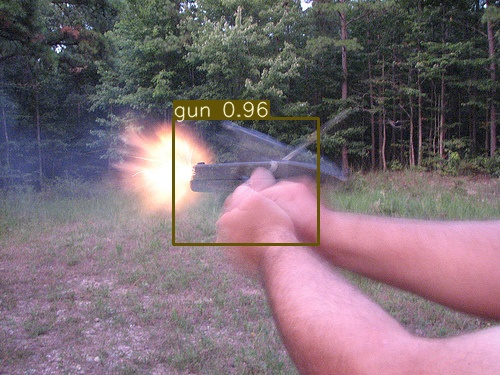

In [0]:
Image(filename='out_out/img230.jpg', width=600)

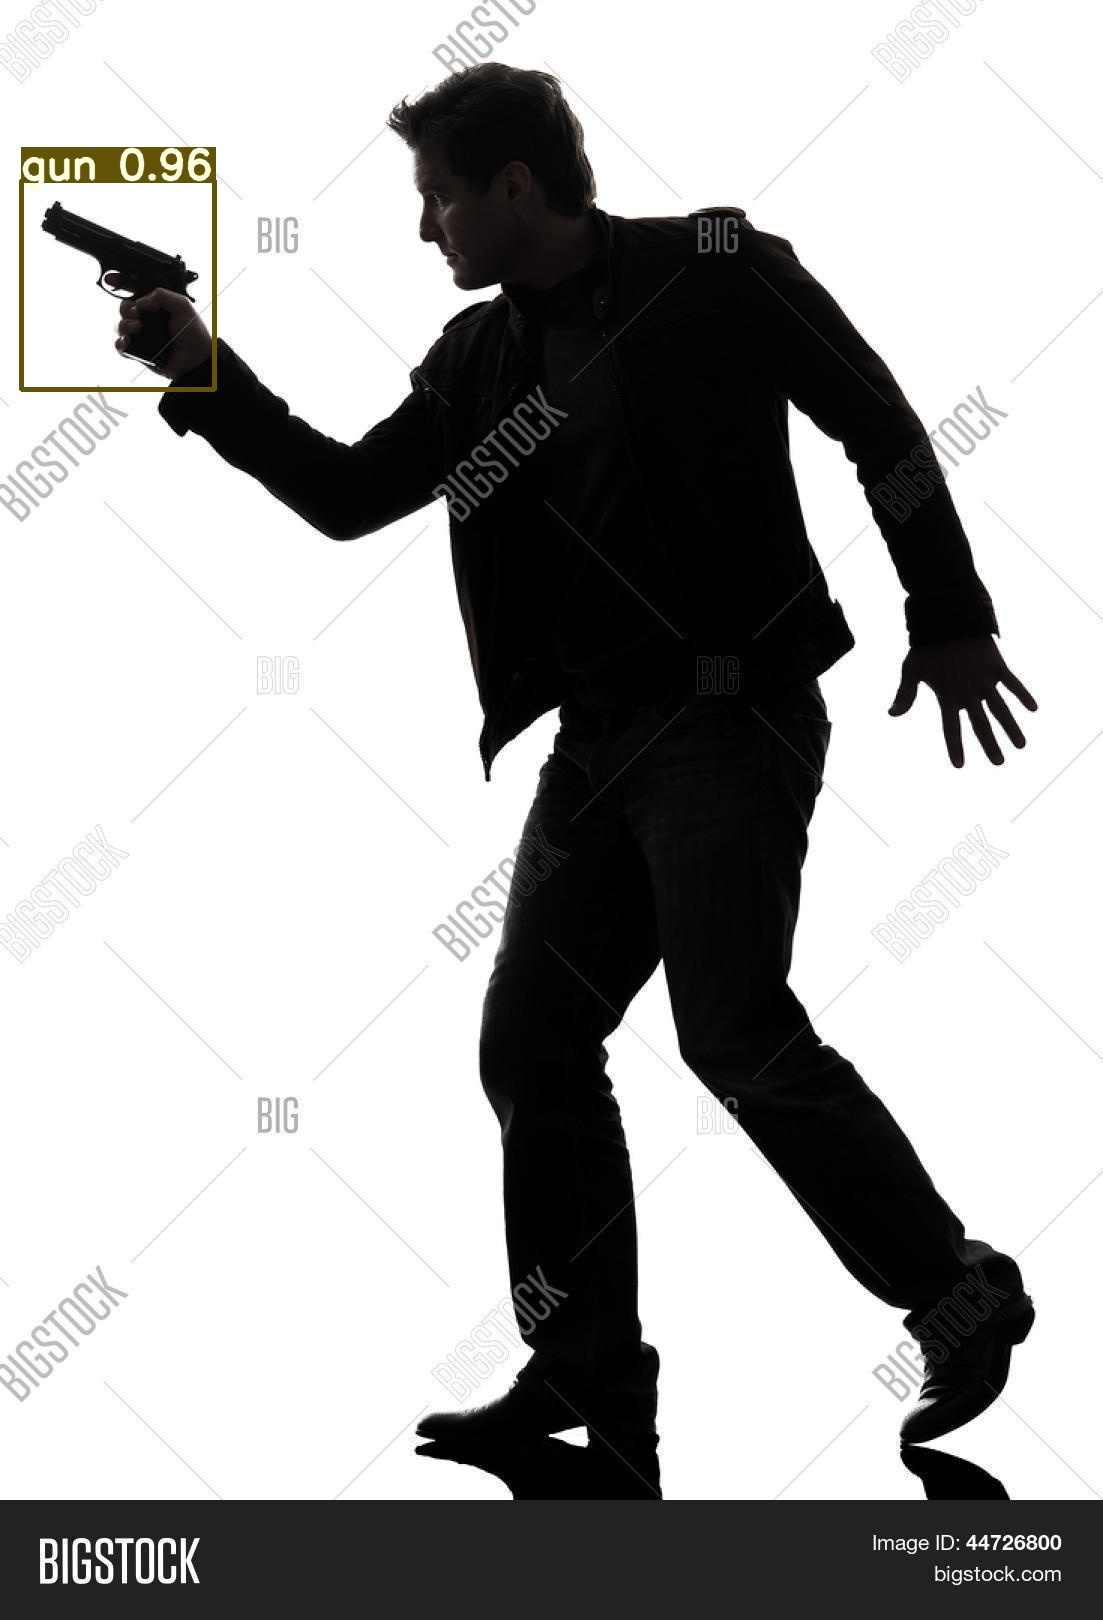

In [0]:
Image(filename='out_out/img380.jpg', width=600)

### install ffmpeg

In [0]:
pip install ffmpeg

  Created wheel for ffmpeg: filename=ffmpeg-1.4-cp36-none-any.whl size=6084 sha256=6119cf40d6b824c84c0ad4aff6dafdb7949f89a904e1eb5b9efb8fb67a94ce38
  Stored in directory: /root/.cache/pip/wheels/b6/68/c3/a05a35f647ba871e5572b9bbfc0b95fd1c6637a2219f959e7a
Successfully built ffmpeg


In [0]:
cd /content/gdrive/My Drive/EVA4/videos

/content/gdrive/My Drive/EVA4/videos


### Extract images from video short gun fight and store it in the folder saho_source

In [0]:
!ffmpeg -i 'short gun fight.mp4' -f image2 saho_source/image-%04d.png 

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

### Runs detect.py on extracted images, and store the detected images back in saho_destination
now it uses weights created now weights/last.pt

to run it later take weights from drive    --weights last.pt

In [0]:
cd /content/YoloV3/

/content/YoloV3


In [0]:
!python detect.py --conf-thres 0.1 --source '/content/gdrive/My Drive/EVA4/videos/saho_source/' --output '/content/gdrive/My Drive/EVA4/videos/saho_destination/'

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='/content/gdrive/My Drive/EVA4/videos/saho_destination/', save_txt=False, source='/content/gdrive/My Drive/EVA4/videos/saho_source/', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/1024 /content/gdrive/My Drive/EVA4/videos/saho_source/image-0001.png: 320x512 2 guns, Done. (0.017s)
image 2/1024 /content/gdrive/My Drive/EVA4/videos/saho_source/image-0002.png: 320x512 2 guns, Done. (0.016s)
image 3/1024 /content/gdrive/My Drive/EVA4/videos/saho_source/image-0003.png: 320x512 2 guns, Done. (0.016s)
image 4/1024 /content/gdrive/My Drive/EVA4/videos/saho_source/image-0004.png: 320x512 2 guns, Done. (0.016s)
image

### build video from images

In [0]:
cd /content/gdrive/My Drive/EVA4/videos

/content/gdrive/My Drive/EVA4/videos


In [0]:
!  ffmpeg -i saho_destination/image-%04d.png saho_gun_detection.mp4

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena